In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, time
import argparse
import tarfile
import re

##impor  BMD files from directory
##TODO: combine bMD processing to single file, combine LPR processing to single file
import bmd_analysis_morpho as bmd
import bmd_analysis_LPR_7_PAH_t0_t239 as bmd_LPR
import format_LPR_input as format_LPR
import format_morpho_input as format_morpho

/Users/degn400/Git_Repos/srpAnalytics/zfBmd
/Users/degn400/Git_Repos/srpAnalytics/zfBmd


In [2]:
morph_file = './test_files/7_PAH_zf_morphology_data_2020NOV11_tall_3756.csv'
lpr_file = './test_files/7_PAH_zf_LPR_data_2021JAN11_3756.csv'
full_devel='full'

LPR_input_csv_file_name_wide = lpr_file[:-4] + "_wide_t0_t239_" + str(full_devel) + ".csv"
morpho_input_csv_file_name_wide = morph_file[:-4] + "_wide_DNC_0_"+full_devel+".csv"

In [3]:
df_morph = pd.read_csv(morph_file, header = 0)

# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']
df_morph_select = df_morph.loc[:,columns_to_keep]

##not all plate ids are integers
df_morph_select['plate.id'] = [str(a) for a in df_morph_select['plate.id']]
df_morph_select.head()

start_time = time.time()

df_reformatted = pd.DataFrame()
total_number_of_unique_chemicals = 0
total_number_of_chemical_plate_well = 0

if (full_devel == "full"):
    # all chemicals
    chemical_id_from_here = pd.unique(df_morph['chemical.id'])
elif (chem_ind is not None): # full_devel = "deve01l"
    chemical_id_from_here = chem_ind
else:
    chemical_id_from_here = random.sample(set(pd.unique(df_morph['chemical.id'])), 1)

##here we iterate through every chemical
for chemical_index in chemical_id_from_here:

    print("chemical_index:" + str(chemical_index))
    total_number_of_unique_chemicals += 1
    morph_data_chemical = df_morph_select.loc[df_morph['chemical.id'] == chemical_index,:]

    # Append chemical_plate_well as a unique identifier
    morph_data_chemical.insert(0, 'chemical_plate_well', morph_data_chemical.loc[:,['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

    for cpw in np.unique(morph_data_chemical.chemical_plate_well):
        total_number_of_chemical_plate_well += 1
        temp_df = morph_data_chemical.loc[morph_data_chemical.chemical_plate_well == cpw,:]

        temp_df_grouped = temp_df.groupby(['chemical.id', 'plate.id', 'well'])
        for name, group in temp_df_grouped:

            ## JUSTIFICATION: 7 PAH dataset doesn't have "BRAI" endpoint.
            ## On the other hand, extracts/phase I,II have "BRAI" endpoint.
            if 'BRAI' not in temp_df.endpoint.values: # as 7 PAH
                try:
                    #            if(len(group.endpoint) == 14):
                    temp = pd.DataFrame( {
                        'chemical.id': pd.unique(temp_df['chemical.id']),
                        'plate.id': pd.unique(temp_df['plate.id']),
                        'well': pd.unique(temp_df['well']),
                        'chemical_plate_well': pd.unique(temp_df['chemical_plate_well']),
                        'conc': pd.unique(temp_df['conc']),
                        'AXIS': temp_df.value[temp_df.endpoint == 'AXIS'].values,
                        'BRN_': temp_df.value[temp_df.endpoint == 'BRN_'].values,
                        'CRAN': temp_df.value[temp_df.endpoint == 'CRAN'].values,
                        'DNC_': temp_df.value[temp_df.endpoint == 'DNC_'].values,
                        'DP24': temp_df.value[temp_df.endpoint == 'DP24'].values,
                        'EDEM': temp_df.value[temp_df.endpoint == 'EDEM'].values,
                        'LTRK': temp_df.value[temp_df.endpoint == 'LTRK'].values,
                        'MO24': temp_df.value[temp_df.endpoint == 'MO24'].values,
                        'MORT': temp_df.value[temp_df.endpoint == 'MORT'].values,
                        'MUSC': temp_df.value[temp_df.endpoint == 'MUSC'].values,
                        'NC__': temp_df.value[temp_df.endpoint == 'NC__'].values,
                        'SKIN': temp_df.value[temp_df.endpoint == 'SKIN'].values,
                        'SM24': temp_df.value[temp_df.endpoint == 'SM24'].values,
                        'TCHR': temp_df.value[temp_df.endpoint == 'TCHR'].values,
                    }  )
                    df_reformatted = pd.concat([df_reformatted, temp])
                except:
                    print ("len(group.endpoint) != 14")
                    print ("chemical_plate_well:" + str(cpw))
            else: #as extracts
                temp = pd.DataFrame(
                    {
                    'chemical.id': pd.unique(temp_df['chemical.id']),
                    'plate.id': pd.unique(temp_df['plate.id']),
                    'well': pd.unique(temp_df['well']),
                    'chemical_plate_well': pd.unique(temp_df['chemical_plate_well']),
                    'conc': pd.unique(temp_df['conc']),
                    'AXIS': temp_df.value[temp_df.endpoint == 'AXIS'].values,
                    'BRAI': temp_df.value[temp_df.endpoint == 'BRAI'].values,
                    'CFIN': temp_df.value[temp_df.endpoint == 'CFIN'].values,
                    'CIRC': temp_df.value[temp_df.endpoint == 'CIRC'].values,
                    'DNC_': temp_df.value[temp_df.endpoint == 'DNC_'].values,
                    'DP24': temp_df.value[temp_df.endpoint == 'DP24'].values,
                    'EYE_': temp_df.value[temp_df.endpoint == 'EYE_'].values,
                    'JAW_': temp_df.value[temp_df.endpoint == 'JAW_'].values,
                    'MO24': temp_df.value[temp_df.endpoint == 'MO24'].values,
                    'MORT': temp_df.value[temp_df.endpoint == 'MORT'].values,
                    'NC24': temp_df.value[temp_df.endpoint == 'NC24'].values,
                    'NC__': temp_df.value[temp_df.endpoint == 'NC__'].values,
                    'OTIC': temp_df.value[temp_df.endpoint == 'OTIC'].values,
                    'PE__': temp_df.value[temp_df.endpoint == 'PE__'].values,
                    'PFIN': temp_df.value[temp_df.endpoint == 'PFIN'].values,
                    'PIG_': temp_df.value[temp_df.endpoint == 'PIG_'].values,
                    'SM24': temp_df.value[temp_df.endpoint == 'SM24'].values,
                    'SNOU': temp_df.value[temp_df.endpoint == 'SNOU'].values,
                    'SOMI': temp_df.value[temp_df.endpoint == 'SOMI'].values,
                    'SWIM': temp_df.value[temp_df.endpoint == 'SWIM'].values,
                    'TRUN': temp_df.value[temp_df.endpoint == 'TRUN'].values,
                    'TR__': temp_df.value[temp_df.endpoint == 'TR__'].values,
                    'YSE_': temp_df.value[temp_df.endpoint == 'YSE_'].values,
                    })
                df_reformatted = pd.concat([df_reformatted, temp])
print ("total_number_of_unique_chemicals:" + str(total_number_of_unique_chemicals))
print ("total_number_of_chemical_plate_well:" + str(total_number_of_chemical_plate_well))
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))


pd.set_option('display.max_columns', None)
print (df_reformatted.head())
#print ("df_reformatted.shape:" + str(df_reformatted.shape)) #(288, 19)

df_reformatted_DNC_0 = pd.DataFrame()

df_reformatted_DNC_0 = df_reformatted.loc[df_reformatted['DNC_'] == 0.0]

chemical_index:3756
total_number_of_unique_chemicals:1
total_number_of_chemical_plate_well:288
Done, it took:0.5 seconds
   chemical.id plate.id well chemical_plate_well   conc  AXIS  BRN_  CRAN  \
0         3756    20544  A01      3756_20544_A01  100.0   NaN   NaN   NaN   
0         3756    20544  A02      3756_20544_A02  100.0   0.0   0.0   0.0   
0         3756    20544  A03      3756_20544_A03  100.0   NaN   NaN   NaN   
0         3756    20544  A04      3756_20544_A04  100.0   0.0   0.0   0.0   
0         3756    20544  A05      3756_20544_A05  100.0   0.0   0.0   0.0   

   DNC_  DP24  EDEM  LTRK  MO24  MORT  MUSC  NC__  SKIN  SM24  TCHR  
0   0.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
0   0.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.

In [4]:
behav_all_data = pd.read_csv(lpr_file, header=0)
behav_all_data.head()
behav_all_data = behav_all_data.dropna()

#behav_all_data_certain_TX = behav_all_data.loc[behav_all_data['bottle.id'] == "TX002271",['chemical.id', 'bottle.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']]
#behav_all_data_certain_TX.head()


# Keep only relevant columns
behav_all_data = behav_all_data.rename(columns = {"variable":"endpoint"})
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']
behav_all_data_select = behav_all_data.loc[:,columns_to_keep]
behav_all_data_select.head()

print(pd.unique(behav_all_data_select['endpoint']))
print(len(pd.unique(behav_all_data_select['endpoint'])))
start_time = time.time()

reformatted_data = pd.DataFrame()
max_time = 240

#full_devel = "full"
#full_devel = "devel"

##we're only collected data for those with 240 time points
##this seems suspiciious, need to ask doo nam/dennis abou tit
chemical_id_from_here = np.unique(behav_all_data.loc[behav_all_data.endpoint=='t239','chemical.id'])
#    if (full_devel == "full"):
# all chemicals
#chemical_id_from_here = np.unique(behav_all_data['chemical.id'])
if(full_devel=='devel'): # full_devel = "devel"
    chemical_id_from_here = random.sample(set(pd.unique(chemical_id_from_here)),1)
    #chemical_id_from_here = np.unique(behav_all_data['chemical.id'])[0]


for chemical_index in chemical_id_from_here:
    print("chemical_index:" + str(chemical_index))
    behav_data_chemical = behav_all_data_select.loc[behav_all_data['chemical.id'] == chemical_index,:]

    # Append chemical_plate_well as a unique identifier
    behav_data_chemical.insert(0, 'chemical_plate_well', behav_data_chemical.loc[:,['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis=1))


    for cpw in pd.unique(behav_data_chemical.chemical_plate_well):
        temp_df = behav_data_chemical.loc[behav_data_chemical.chemical_plate_well == cpw,:]
        #print("temp_df.head():\n" + str(temp_df.head()))
        temp_df_grouped = temp_df.groupby(['chemical.id', 'plate.id', 'well'])
        #print("temp_df_grouped.head():\n" + str(temp_df_grouped.head()))
        for name, group in temp_df_grouped:
            #print ("len(group.endpoint):" + str(len(group.endpoint)))
            if(len(group.endpoint) == max_time): ## we shouldn't need this any more
                temp = pd.DataFrame(
                    {
                    'chemical.id': pd.unique(temp_df['chemical.id']),
                    'plate.id': pd.unique(temp_df['plate.id']),
                    'well': pd.unique(temp_df['well']),
                    'chemical_plate_well': pd.unique(temp_df['chemical_plate_well']),
                    'conc': pd.unique(temp_df['conc'])
                    })
                #print(temp.head())
                # Append additonal columns corresponding to time points
                for time_point in np.arange(max_time):
                    end_point = 't'+ str(time_point)
                    temp = pd.concat([temp, pd.DataFrame({end_point: temp_df.value[temp_df.endpoint == end_point].values})],axis = 1)
                reformatted_data = pd.concat([reformatted_data, temp])
            else:
                print("Group endpoint is not max time:"+str(len(group.endpoint)))

['t0' 't1' 't2' 't3' 't4' 't5' 't6' 't7' 't8' 't9' 't10' 't11' 't12' 't13'
 't14' 't15' 't16' 't17' 't18' 't19' 't20' 't21' 't22' 't23' 't24' 't25'
 't26' 't27' 't28' 't29' 't30' 't31' 't32' 't33' 't34' 't35' 't36' 't37'
 't38' 't39' 't40' 't41' 't42' 't43' 't44' 't45' 't46' 't47' 't48' 't49'
 't50' 't51' 't52' 't53' 't54' 't55' 't56' 't57' 't58' 't59' 't60' 't61'
 't62' 't63' 't64' 't65' 't66' 't67' 't68' 't69' 't70' 't71' 't72' 't73'
 't74' 't75' 't76' 't77' 't78' 't79' 't80' 't81' 't82' 't83' 't84' 't85'
 't86' 't87' 't88' 't89' 't90' 't91' 't92' 't93' 't94' 't95' 't96' 't97'
 't98' 't99' 't100' 't101' 't102' 't103' 't104' 't105' 't106' 't107'
 't108' 't109' 't110' 't111' 't112' 't113' 't114' 't115' 't116' 't117'
 't118' 't119' 't120' 't121' 't122' 't123' 't124' 't125' 't126' 't127'
 't128' 't129' 't130' 't131' 't132' 't133' 't134' 't135' 't136' 't137'
 't138' 't139' 't140' 't141' 't142' 't143' 't144' 't145' 't146' 't147'
 't148' 't149' 't150' 't151' 't152' 't153' 't154' 't155' 't15


Plates/Wells/Concentration information about compound: 3756
Plate IDs: [20544 20624 20625]
Number of unique plates: 3
Concentrations tested: [  0.     2.16   6.8   14.7   31.6   56.2   75.   100.  ]
Number of concentrations: 8
Total number of wells: 223
   chemical.id plate.id well chemical_plate_well   conc  AXIS  BRN_  CRAN  \
0         3756    20544  A01      3756_20544_A01  100.0   NaN   NaN   NaN   
0         3756    20544  A02      3756_20544_A02  100.0   0.0   0.0   0.0   
0         3756    20544  A03      3756_20544_A03  100.0   NaN   NaN   NaN   
0         3756    20544  A04      3756_20544_A04  100.0   0.0   0.0   0.0   
0         3756    20544  A05      3756_20544_A05  100.0   0.0   0.0   0.0   

   DNC_  DP24  EDEM  LTRK  MO24  MORT  MUSC  NC__  SKIN  SM24  TCHR  
0   0.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
0   0.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
0 

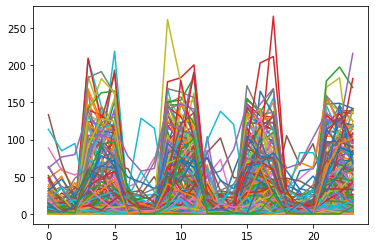

In [5]:
report = True
lpr_all_data = reformatted_data
#print(lpr_all_data.head())
#display("lpr_all_data.shape:" + str(lpr_all_data.shape))
# Convert plate ids to ints
lpr_all_data['plate.id'] = (lpr_all_data['plate.id'].values).astype(int)
#print(lpr_all_data)

pd.unique(lpr_all_data.well)

unique_chemical_IDs = pd.unique(lpr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical, append to list
# SG: I think this is all this loop does?
for chemical_ID in unique_chemical_IDs:
    lpr_data_subset = lpr_all_data.loc[lpr_all_data['chemical.id'] == chemical_ID]
    if (report):
        print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
        print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
        print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
        print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
        print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
        print('Total number of wells:', lpr_data_subset.shape[0])
    for concentration_id in np.unique(lpr_data_subset['conc']):
        lpr_data_subset_concs = lpr_data_subset.loc[lpr_data_subset['conc'] == concentration_id]
        #print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((lpr_data_subset_concs['well']))}, ignore_index=True)

# ## Load morphological data for filtering wells that have dead fish


#morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_morphology_data_2021JAN11_wide_made_in_2021_01_19_DNC_0.csv'

morphology_all_data = df_reformatted_DNC_0
if (report):
    print(morphology_all_data.head())


# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
lpr_all_data['Chemical_Plate_WELL'] = lpr_all_data[['chemical.id', 'plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis=1)
morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id', 'plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis=1)
morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
lpr_filtered_data = lpr_all_data.loc[lpr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]

if (report):
    print("morphology_all_data.shape:" + str(morphology_all_data.shape))
    print("morphology_nonna_data_plate_well.shape:" + str(morphology_nonna_data_plate_well.shape))

    print("\nlpr_all_data.shape:" + str(lpr_all_data.shape))
    print("lpr_filtered_data.shape:"+str(lpr_filtered_data.shape) + "\n")

    print(morphology_nonna_data_plate_well[0:5])
    print("\n")
    print(lpr_all_data.Chemical_Plate_WELL[0:5])

#(set(list(morphology_nonna_data_plate_well)) - set(list(lpr_all_data['Chemical_Plate_WELL'])))

#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(lpr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

#SJCG: commented this out
#lpr_filtered_data.head()


# Convert time resolution to minutes (if applicable)
# for LPR, 240 -> 24

# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields
lpr_filtered_data_in_minute = lpr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]
time_index_sec_start = 5
max_time_index_sec = 240 # from 0 to 239

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
#print ("interval:" + str(interval))
if(interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif(interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)

for time_index in range(int(max_time_index_sec / group_size)):
    if(report):
        print("\ntime_index:" + str(time_index))

    start_index = time_index_sec_start + group_size * time_index
    if(report):
        print("start_index:" + str(start_index))

    end_index = start_index + group_size
    if(report):
        print("end_index:" + str(end_index))

    lpr_filtered_data_in_minutes_in_this_time_index = pd.DataFrame(np.sum(lpr_filtered_data.iloc[:,start_index:end_index], axis=1))
    if (report):
        print("lpr_filtered_data_in_minutes_in_this_time_index.shape:\n" + str(lpr_filtered_data_in_minutes_in_this_time_index.shape))
        print(lpr_filtered_data_in_minutes_in_this_time_index.head())
        print(lpr_filtered_data_in_minutes_in_this_time_index.tail())

    lpr_filtered_data_in_minutes_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    lpr_filtered_data_in_minute = pd.concat([lpr_filtered_data_in_minute, lpr_filtered_data_in_minutes_in_this_time_index], axis=1)
#pd.set_option('display.max_columns', None)
#lpr_filtered_data_in_minute.head()

# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values
num_time_points = 24 # >= 25 will not make any difference

#print ("lpr_filtered_data_in_minute.shape:" + str(lpr_filtered_data_in_minute.shape)) #(223, 28)
fig, ax = plt.subplots()
if report:
    print(lpr_filtered_data_in_minute.iloc[10:15, time_index_start:time_index_start + num_time_points])
    # first ':' shows rows, second ':' shows columns
    ax.plot(np.transpose(lpr_filtered_data_in_minute.iloc[10:223,time_index_start:time_index_start + num_time_points].values));

delta_mov_auc = lpr_filtered_data_in_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()

#transition_points = [4,10,16,22]
# middle points of each peak -> 4,10,16,22

#transition_points = [4,10,16] # using 22 caused an error
#--> results with these transition_points tend to be NA

transition_points = [2]
# following Paritosh's example, eventually 2,8,14 etc,
# but for now (portal establishment), only the first transition is needed.

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark = 3

#delta_mov_auc['MOV_1_2_3'] = 0 # just initial value
#delta_mov_auc['AUC_1_2_3'] = 0 # just initial value

for transition_index, transition_point in enumerate(transition_points):
    if report:
        print("\n")
        print("transition_index:" + str(transition_index))
        print("transition_point:" + str(transition_point))

    delta_mov_auc['MOV' + str(transition_index + 1)] \
    = lpr_filtered_data_in_minute['t' + str(transition_point + 1)] \
    - lpr_filtered_data_in_minute['t' + str(transition_point)]

    delta_mov_auc['AUC' + str(transition_index + 1)] \
    = sum(lpr_filtered_data_in_minute['t' + str(transition_point + 1 + index_count)] \
            for index_count in range(num_dark)) \
    - sum(lpr_filtered_data_in_minute['t' + str(transition_point - index_count)] \
            for index_count in range(num_light))

    # I didn't fully understand this part, but it works as intended
    #delta_mov_auc['MOV_1_2_3'] = delta_mov_auc['MOV_1_2_3'] + delta_mov_auc['MOV' + str(transition_index + 1)]
    #delta_mov_auc['AUC_1_2_3'] = delta_mov_auc['AUC_1_2_3'] + delta_mov_auc['AUC' + str(transition_index + 1)]
if report:
    print(delta_mov_auc.head())
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace=True)
    

In [6]:
end_point = 'AUC1'
global_report = True
delta_mov_auc_data = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == 3756,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]

try:
    unique_plate_IDs = np.unique(delta_mov_auc_data['Plate'])
except:
    unique_plate_IDs = np.unique(delta_mov_auc_data['plate.id'])
#print('Unique number of plates:', len(unique_plate_IDs))

abnormal_response_wells = [];

# Count number of abnormal negative control wells wells for each chemical
for plate_ID in unique_plate_IDs:
    plate_data_subset = delta_mov_auc_data.loc[delta_mov_auc_data['Plate'] == plate_ID]

    # Extract data for negative control wells
    plate_data_subset_nc = plate_data_subset.loc[plate_data_subset['CONC'] == 0]

    # Display the number of negative control wells for sanity check
    #print('Number of negative control wells on plate:', plate_ID, 'are:', plate_data_subset_nc.shape[0])

    # Count and display the number of wells with negative response values
    number_of_abnormal_nc_wells = (plate_data_subset_nc.loc[plate_data_subset_nc[end_point] < 0]).shape[0]
    #print('Number of abnormal response negative control wells:', number_of_abnormal_nc_wells)

    if(number_of_abnormal_nc_wells >= (plate_data_subset_nc.shape[0])/2):
        abnormal_response_wells.append(plate_ID)

# Remove data for abnormal wells
delta_mov_auc_normal = delta_mov_auc_data[~delta_mov_auc_data['Plate'].isin(abnormal_response_wells)]

# Pre-define dataframe for dose-respose
dose_response_info = pd.DataFrame(columns = ['Concentration', 'Response',
                                                'Hypo', 'Hyper', 'Number_of_Wells'])
dose_response = pd.DataFrame(columns = ['dose', 'num_affected', 'num_embryos'])

# Get data for a given concentration
delta_mov_auc_data_compound = delta_mov_auc_normal
all_neg_control_vals = delta_mov_auc_data_compound.loc[delta_mov_auc_data_compound['CONC'] == 0.0]

concentrations = np.unique(delta_mov_auc_data_compound['CONC'])
for concentration in concentrations:
    if concentration != 0.0:
        delta_mov_auc_data_compound_concentration = delta_mov_auc_data_compound.loc[delta_mov_auc_data_compound['CONC'] == concentration]
        plate_ids = np.unique(delta_mov_auc_data_compound_concentration['Plate'])
        #print("Plate(s) for concentration:", concentration, "are:", plate_ids)
        #print(delta_mov_auc_data_compound_concentration.shape)
        count_response_wells = 0
        count_total_wells = 0
        count_hypo_wells = 0
        count_hyper_wells = 0
        for plate_id in plate_ids:
            neg_control_plate_specific_vals = all_neg_control_vals.loc[all_neg_control_vals['Plate'] == plate_id]
            neg_control_ref_vals = neg_control_plate_specific_vals[end_point]
            response_vals_plate = delta_mov_auc_data_compound_concentration.loc[delta_mov_auc_data_compound_concentration['Plate'] == plate_id]
            response_vals = response_vals_plate[end_point]
            #if (global_report):
            #    print (f"response_vals:\n{response_vals}")

            response_vals_positive = response_vals[response_vals >= 0]
            #if (global_report):
            #       print (f"response_vals_positive:\n{response_vals_positive}")
            # (note) for chemical_id = 1155 and plate.id = 13739, response_vals and response_vals_positive are same

            # Identify hypo- and hyperactive responses
            Q1_neg_control_vals = neg_control_ref_vals.quantile(0.25)
            Q3_neg_control_vals = neg_control_ref_vals.quantile(0.75)
            IQR_neg_control_vals = Q3_neg_control_vals - Q1_neg_control_vals

            hyper_response_vals = response_vals_positive[(response_vals_positive < (Q1_neg_control_vals - 1.5 * IQR_neg_control_vals)) | (response_vals_positive > (Q3_neg_control_vals + 1.5 * IQR_neg_control_vals))]

            # (note) for chemical_id = 1155 and plate.id = 13739, 0 counts are counted twice (both hyper and hypo_response_vals)

            # so fix here
            hyper_response_vals = hyper_response_vals[hyper_response_vals > 0]

            if (global_report):
                    print (f"\n\nhyper_response_vals:\n{hyper_response_vals}")
                    print (f"\n\ntype(hyper_response_vals):\n{type(hyper_response_vals)}")

            hypo_response_vals = response_vals[response_vals <= 0]
            if (global_report):
                    print (f"hypo_response_vals:\n{hypo_response_vals}")

            #Compare box-plots for visual inspection
            #fig, ax = plt.subplots()
            #bp = ax.boxplot([neg_control_ref_vals , response_vals])
            #ax.set_xticklabels(['Neg. Ctrl', 'Response'])
            count_hypo_wells+= len(hypo_response_vals)
            count_hyper_wells+= len(hyper_response_vals)
            count_response_wells += (len(hypo_response_vals) + len(hyper_response_vals))
            count_total_wells += len(response_vals)
            response_value = count_response_wells/count_total_wells

        # Populate dose response dataframe
        # Obtain the total number of wells for a compound and concentration before any filtering is performed
        dose_response_info = dose_response_info.append({'Concentration': concentration,
                                                        'Response': response_value ,
                                                        'Hypo': count_hypo_wells,
                                                        'Hyper': count_hyper_wells,
                                                        'Number_of_Wells': count_total_wells},
                                                            ignore_index = True)

        dose_response = dose_response.append({'dose': concentration,
                                                'num_affected': (count_hypo_wells + count_hyper_wells),
                                                'num_embryos': count_total_wells},
                                                ignore_index = True)

    else: #For concentration = 0.0 or negative controls
        delta_mov_auc_data_compound_concentration = delta_mov_auc_data_compound.loc[delta_mov_auc_data_compound['CONC'] == concentration]
        plate_ids = np.unique(delta_mov_auc_data_compound_concentration['Plate'])
        count_response_wells = 0
        count_total_wells = 0
        count_hypo_wells = 0
        count_hyper_wells = 0
        #print("Plate(s) for concentration:", concentration, "are:", plate_ids)
        for plate_id in plate_ids:
            neg_control_plate_specific_vals = all_neg_control_vals.loc[all_neg_control_vals['Plate'] == plate_id]
            neg_control_ref_vals = neg_control_plate_specific_vals[end_point]

            count_response_wells += len(neg_control_ref_vals[neg_control_ref_vals < 0])
            count_total_wells += len(neg_control_ref_vals)
            response_value = count_response_wells/count_total_wells

        # Populate dose response dataframe
        # Obtain the total number of wells for a compound and concentration before any filtering is performed
        dose_response_info = dose_response_info.append({'Concentration': concentration,
                                                        'Response': response_value ,
                                                        'Hypo': count_response_wells,
                                                        'Hyper': np.nan,
                                                        'Number_of_Wells': count_total_wells},
                                                            ignore_index = True)

        dose_response = dose_response.append({'dose': concentration,
                                                'num_affected': count_response_wells,
                                                'num_embryos': count_total_wells},
                                                ignore_index = True)



hyper_response_vals:
Series([], Name: MOV1, dtype: float64)


type(hyper_response_vals):
<class 'pandas.core.series.Series'>
hypo_response_vals:
0   -1.034
Name: MOV1, dtype: float64


hyper_response_vals:
Series([], Name: MOV1, dtype: float64)


type(hyper_response_vals):
<class 'pandas.core.series.Series'>
hypo_response_vals:
0   -10.878
Name: MOV1, dtype: float64


hyper_response_vals:
Series([], Name: MOV1, dtype: float64)


type(hyper_response_vals):
<class 'pandas.core.series.Series'>
hypo_response_vals:
0    0.0
Name: MOV1, dtype: float64


hyper_response_vals:
Series([], Name: MOV1, dtype: float64)


type(hyper_response_vals):
<class 'pandas.core.series.Series'>
hypo_response_vals:
0    0.00
0   -9.57
Name: MOV1, dtype: float64


hyper_response_vals:
Series([], Name: MOV1, dtype: float64)


type(hyper_response_vals):
<class 'pandas.core.series.Series'>
hypo_response_vals:
0    0.000
0   -2.027
0    0.000
0    0.000
0    0.000
0    0.000
Name: MOV1, dtype: float64


hyper_resp

In [18]:
't' + str(transition_point)

't2'